In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# CSV dosyasını oku
csv_file_path = "accent-mfcc-data-1.csv"
df = pd.read_csv(csv_file_path)

# "language" sütunu label olarak, X1-X12 sütunları özellik olarak seç
selected_features = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12"]
X = df[selected_features]
y = df["language"]

In [3]:
# Veriyi train ve test setlerine ayır (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# Verilerin ölçeklendirilmesi (scaling) - KNN hassas bir algoritma olduğu için önemli
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# KNN sınıflandırıcısını oluştur
knn = KNeighborsClassifier(n_neighbors=5)  # İhtiyaca göre komşu sayısını (n_neighbors) ayarlayanır//   n_neighbours 3 ken acc 0.85, 4 ken 0.77, 2 de 0.76, 5 de 0.79

# Modeli eğit
knn.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yap
y_pred = knn.predict(X_test_scaled)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

          ES       0.67      0.67      0.67         6
          FR       0.83      0.83      0.83         6
          GE       0.70      1.00      0.82         7
          IT       0.71      1.00      0.83         5
          UK       0.67      0.67      0.67         9
          US       0.89      0.76      0.82        33

    accuracy                           0.79        66
   macro avg       0.75      0.82      0.77        66
weighted avg       0.80      0.79      0.79        66



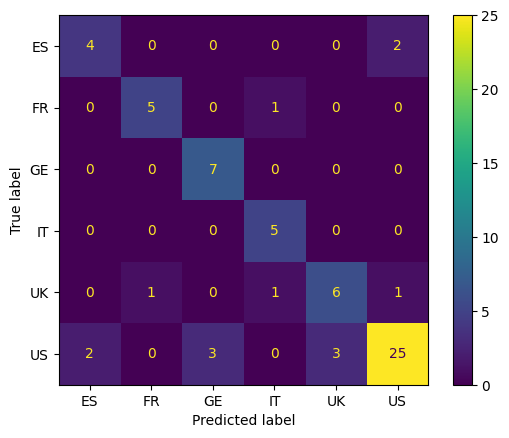

In [8]:
# Sınıflandırma raporu ve ConfusionMatrixDisplay 
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.show()

In [11]:
# KNN sınıflandırıcısını oluştur
knn = KNeighborsClassifier(n_neighbors=3)  # İhtiyaca göre komşu sayısını (n_neighbors) ayarlayanır//   n_neighbours 3 ken acc 0.85, 4 ken 0.77, 2 de 0.76, 5 de 0.79

# Modeli eğit
knn.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yap
y_pred = knn.predict(X_test_scaled)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

          ES       0.75      1.00      0.86         6
          FR       0.71      0.83      0.77         6
          GE       0.70      1.00      0.82         7
          IT       0.71      1.00      0.83         5
          UK       0.86      0.67      0.75         9
          US       1.00      0.82      0.90        33

    accuracy                           0.85        66
   macro avg       0.79      0.89      0.82        66
weighted avg       0.88      0.85      0.85        66



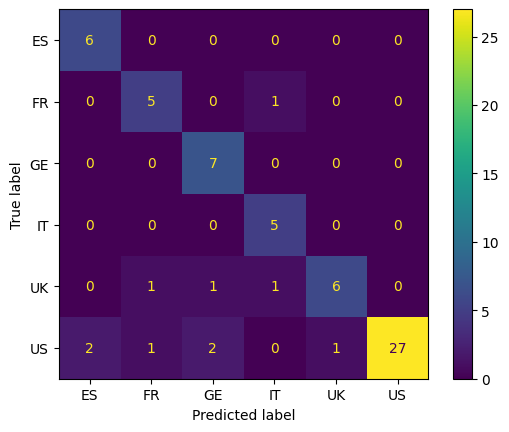

In [12]:
# Sınıflandırma raporu ve ConfusionMatrixDisplay 
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.show()